<h3>K-Means</h3>

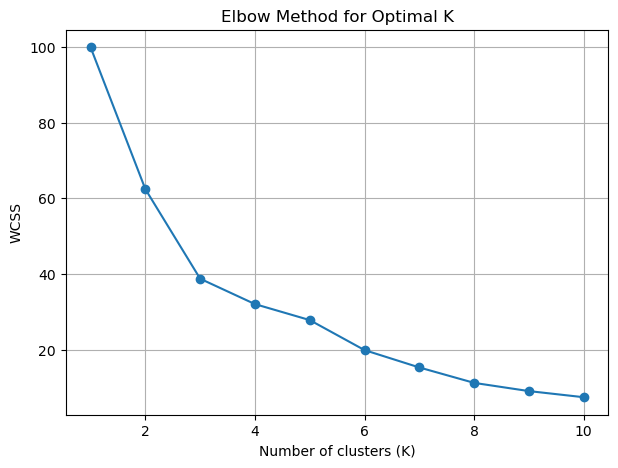

   ID         BEER  CAL  SOD  ALC  COST  Cluster
0   1    Budweiser  144   15  4.7  0.43        0
1   2      Schlitz  151   19  4.9  0.43        0
2   3    Lowenbrau  157   15  4.9  0.48        0
3   4  Kronenbourg  170    7  5.2  0.73        2
4   5     Heineken  152   11  5.0  0.77        2


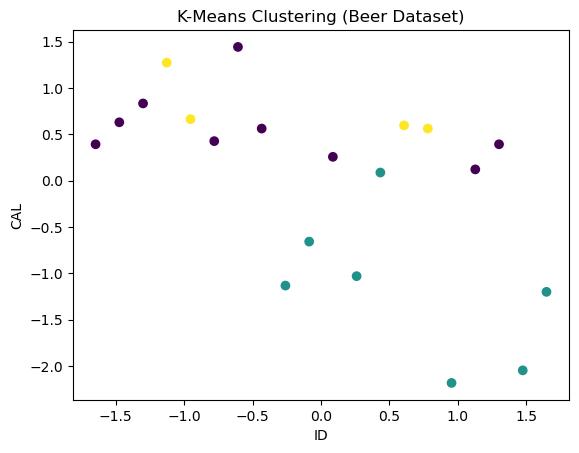

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Load your beer dataset
df = pd.read_csv("D:\\MachineLearning\\DataSets\\beerh.csv")   # OR "beerc.csv"

# Use only numeric columns
X = df.select_dtypes(include=['int64','float64'])

# Scale data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 1) Elbow Method
# -------------------------------
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# -------------------------------
# 2) Apply K-Means (choose K=3 as example)
# -------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print(df.head())

# -------------------------------
# 3) Simple Scatter Plot
#    (Using first two numeric columns)
# -------------------------------
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df["Cluster"], cmap="viridis")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("K-Means Clustering (Beer Dataset)")
plt.show()
